<a href="https://colab.research.google.com/github/minimario/nn-random-labels/blob/main/analyzing_weights_of_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install mnist

In [ ]:
import numpy as np
import mnist
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import to_categorical
from keras.models import load_model

np.random.seed(0)
tf.random.set_seed(0)

In [ ]:
# prepare mnist
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# normalize the images
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.7188 - accuracy: 0.7860
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2132 - accuracy: 0.9368
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1619 - accuracy: 0.9501
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1239 - accuracy: 0.9631
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0947 - accuracy: 0.9712
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0862 - accuracy: 0.9728
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0742 - accuracy: 0.9772
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0686 - accuracy: 0.9798
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0624 - accuracy: 0.9800
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0853 - accuracy: 0.9739

In [ ]:
# Build the model.
model = Sequential([
  Flatten(),
  Dense(100, activation='relu', input_shape=(784,)),
  Dense(100, activation='relu'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=128,
)

# evaluate the model
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

In [ ]:
# save the model
model.save('model.h5')

In [ ]:
# load the model
model = load_model('model.h5')

78400 78400 78400


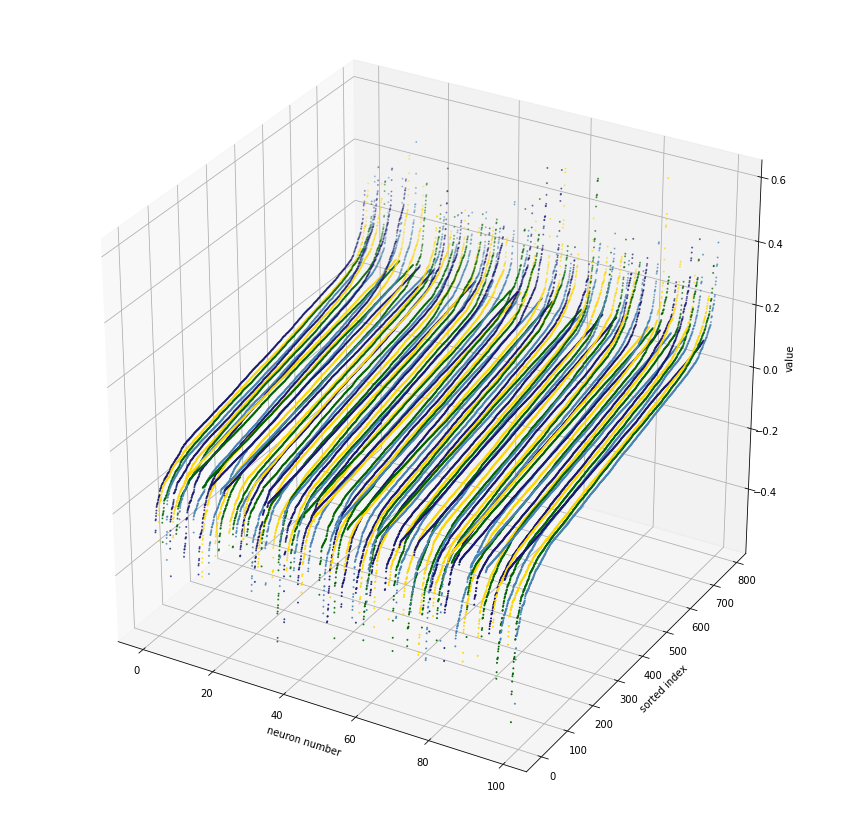

In [ ]:
# 3d plot!

# extract weights
w1, b1, w2, b2, w3, b3 = list(map(lambda x:x.numpy(), model.weights))

# set up plot
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection="3d")

# (x, y, z)
xs = []
ys = []
zs = []
cols = []

col_choices = ['midnightblue', 'gold', 'darkgreen', 'steelblue']

num_vectors = 100
vec_length = 784

for i in range(num_vectors):
  vec = w1[:, i] # weights for ith neuron
  vec.sort() # sort weights
  xs += [i] * vec_length # xs = neuron number
  ys += list(np.arange(len(vec))) # ys = index in sorted vector
  zs += list(vec) # zs = neuron value
  cols += [col_choices[i%4]] * vec_length
print(len(xs), len(ys), len(zs))
ax.scatter(xs, ys, zs, c=cols, s=1)
ax.set_xlabel('neuron number')
ax.set_ylabel('sorted index')
ax.set_zlabel('value')

plt.show()

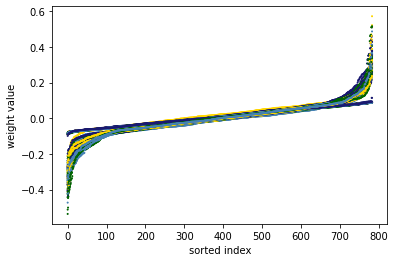

In [ ]:
# 2d projection
plt.scatter(ys, zs, c=cols,  s=1)
plt.xlabel('sorted index')
plt.ylabel('weight value')
plt.show()

In [ ]:
w1, b1, w2, b2, w3, b3 = list(map(lambda x:x.numpy(), model.weights))
# wi: (# of neurons in layer i, # of neurons in layer i+1), so (784, 100) for first layer
def relu(x): 
    return np.maximum(0, x)

# yes these both work
def net(x):
  return w3.T@relu(w2.T@relu(w1.T@x+b1)+b2)+b3

def net2(x):
  return relu(relu(x@w1+b1)@w2+b2)@w3+b3

x = test_images[0].reshape(784)
# print(x.shape)
# print(w1.shape)
# print(w2.shape)
# print(w3.shape)
print(net(x))
print(net2(x))

[ -4.39232054  -6.89042833   2.13463445   1.26904283 -14.20233125
  -6.15339254 -14.62631694  11.20187457  -4.44641605  -1.74531364]
[ -4.39232054  -6.89042833   2.13463445   1.26904283 -14.20233125
  -6.15339254 -14.62631694  11.20187457  -4.44641605  -1.74531364]
